In [1]:
#Read in master table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline
master_df = pd.read_csv('data/Master_Table.csv')
master_df = master_df.drop(columns='Unnamed: 0')
master_df.head()
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3188 entries, 0 to 3187
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title_ID         3188 non-null   object 
 1   Title            3188 non-null   object 
 2   Year             3188 non-null   int64  
 3   Runtime_Minutes  3158 non-null   float64
 4   Genres           3184 non-null   object 
 5   Lifetime_Gross   3188 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 149.6+ KB


/Users/jamesfay/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#30 movies with null runtime values
#replace with median runtime
runtime_df = master_df
runtime_df['Runtime_Minutes'].fillna(runtime_df['Runtime_Minutes'].median(), inplace=True)
runtime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3188 entries, 0 to 3187
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title_ID         3188 non-null   object 
 1   Title            3188 non-null   object 
 2   Year             3188 non-null   int64  
 3   Runtime_Minutes  3188 non-null   float64
 4   Genres           3184 non-null   object 
 5   Lifetime_Gross   3188 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 149.6+ KB


**Check Distribution**

(50, 200)

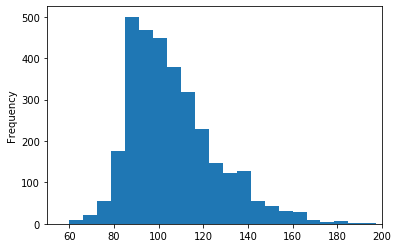

In [3]:
#Distribution of Runtime - Skewed right a bit
runtime_df['Runtime_Minutes'].plot.hist(bins=40)
plt.xlim(50, 200)

**Create Categorical Var Based on Runtime Bins**

In [4]:
#Half of movies are between 1:32 and 1:57 in length
runtime_df[['Runtime_Minutes']].describe()

,Runtime_Minutes
count,3188.000000
mean,106.287641
std,20.006696
min,60.000000
25%,92.000000
50%,102.500000
75%,117.000000
max,310.000000


**Bins with Equal Number of Occurrences**

In [28]:
runtime_df['Runtime_Bins'] = pd.qcut(runtime_df['Runtime_Minutes'], q = 6)
runtime_df['Runtime_Bins'].value_counts()

(102.5, 111.0]    561
(59.999, 89.0]    560
(89.0, 95.0]      535
(95.0, 102.5]     514
(111.0, 125.0]    510
(125.0, 310.0]    508
Name: Runtime_Bins, dtype: int64

In [29]:
bin_names = ['Very Short', 'Short', 'Medium', 'Medium-Long', 'Long', 'Very Long']
runtime_df['Runtime_Bins'] = pd.qcut(runtime_df['Runtime_Minutes'], q = 6, labels = bin_names)
runtime_df['Runtime_Bins'].value_counts()

Medium-Long    561
Very Short     560
Short          535
Medium         514
Long           510
Very Long      508
Name: Runtime_Bins, dtype: int64

In [30]:
equal_bins = runtime_df.groupby('Runtime_Bins').median()
equal_bins = equal_bins[['Lifetime_Gross']]
equal_bins

,Lifetime_Gross
Runtime_Bins,
Very Short,66423.0
Short,129124.0
Medium,965542.0
Medium-Long,2146999.0
Long,8379841.5
Very Long,2184309.5


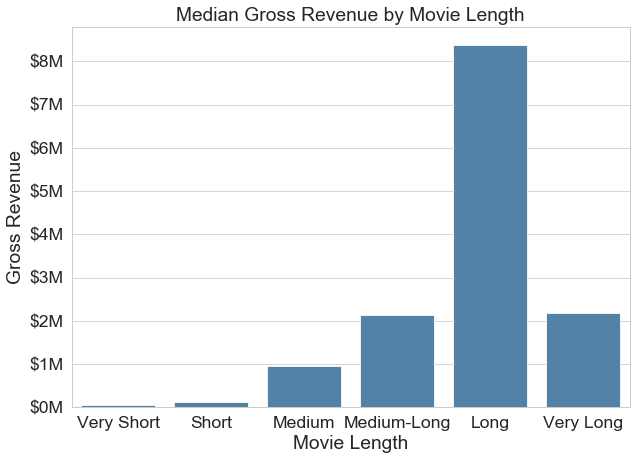

In [36]:
#Set style, font size, figure size
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=2) 
fig, ax = plt.subplots(figsize=(10, 7))

#Format y axis for millions of dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.0f}'.format(x/1000000) + 'M'))



#Create graph and format labels
g = sns.barplot(x= equal_bins.index, y=equal_bins['Lifetime_Gross'], data = equal_bins, color='steelblue').set(xlabel = 'Movie Length', ylabel = 'Gross Revenue', title = 'Median Gross Revenue by Movie Length')